## **데이터 분석과 예측**

**4주 전**

8T 전에는 dictionary, for 과 while 문의 사용법을 배웠다.

7T 전에는 Pandas의 Series, DataFrame 을 배웠다.

**3주 전**

6T 전에는 Numpy와 Matplotlib.pyplot의 사용법을 배웠다.

5T 전에는 Folium Library의 사용법을 배웠다.

**2주 전**

4T 전에는 대단원 평가를 진행했다.

3T 전에는 Python을 이용하여 median, average, mode를 구했다. 또 알맞은 데이터의 통계를 구했다.

**1주 전**

2T 전에는 Python을 이용하여 분산과 표준편차를 구하고 그 값을 그래프의 형태로 나타냈다. sklearn

지난 시간에는 산점도와 데이터셋을 이용하여 최소 제곱법을 활용한 최적의 곡선(직선)을 찾는 방법을 알아보았다.

**이번 주**

이번 시간에는 모델을 구하고 모델에 대한 성능 지표(평균제곱오차, 결정계수)를 구하는 방법을 알아본다.

In [1]:
# 홀드아웃 교차 검증법: 하나의 데이터 세트를 학습용 데이터와 테스트용 데이터로 분할하여 검증하는 방법이다.
# K-분할 교차: K 개수만큼 반복하여 검증

hello


기울기 : [[-0.83737793]] 절편 : [11.58804862]
평균 전운량: 3 일조 시간 : 9.075914822326073
평균 전운량: 3 일조 시간 : [[9.07591482]]


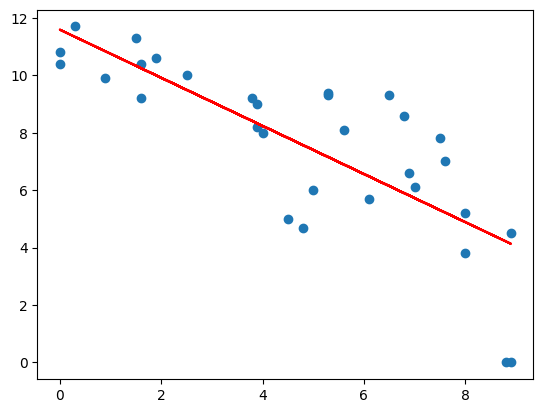

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/Ⅱ311_cloudiness03_data_01.csv', encoding ='cp949')

x = np.array(df['평균 전운량(1/10)']).reshape(-1, 1)
y = np.array(df['합계 일조 시간(hr)']).reshape(-1, 1)

model = LinearRegression().fit(x, y)
print("기울기 :", model.coef_, "절편 :", model.intercept_)
plt.scatter(df['평균 전운량(1/10)'], df['합계 일조 시간(hr)'])

b0 = model.intercept_[0]
b1 = model.coef_[0][0]
plt.plot(x, b0 + b1*x, 'r' ) #그래프 그리기

cloudy=3
print('평균 전운량:',cloudy,'일조 시간 :',b0+b1*cloudy)
print('평균 전운량:',cloudy,'일조 시간 :',model.predict([[cloudy]]))

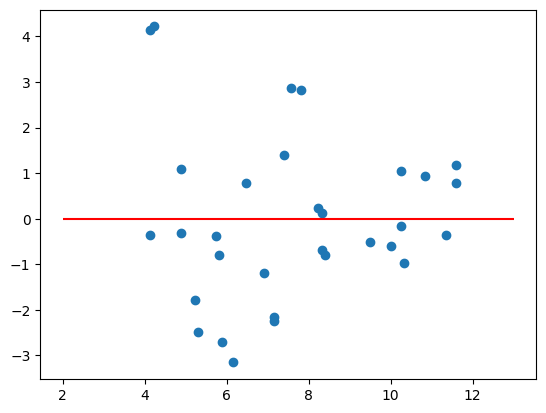

In [5]:
plt.scatter(model.predict(x), model.predict(x)-y)
# 오차의 시각화
plt.hlines(y=0, xmin=2, xmax=13, color='red')
# y=0인 가로선
# y=0 인 가로선에 가까이 있을수록 좋다.

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("평균제곱오차 :", mean_squared_error(y, model.predict(x)))
print("결정계수 :", r2_score(y, model.predict(x)))

#평균제곱오차 값은 상대적인 값이다. 절대적인 숫자로는 알 수 없지만, 값이 더 작을수록 좋다. (여러 가지 비교 시)
# 결정계수의 값은 1에 가까울수록 좋은 것이다.

평균제곱오차 : 3.2413413546801357
결정계수 : 0.6203352532113653


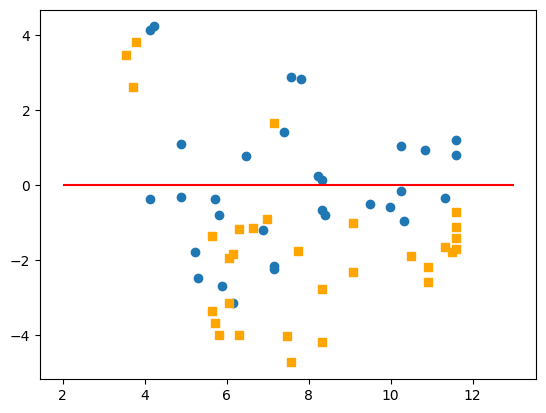

In [9]:
#회귀분석 모델을 얻기 위한 데이터
df1 = pd.read_csv('/content/Ⅱ311_cloudiness03_data_01.csv', encoding = 'cp949')
x = np.array(df1['평균 전운량(1/10)']).reshape(-1, 1)
y = np.array(df1['합계 일조 시간(hr)']).reshape(-1, 1)

#시험용 데이터, 테스트용 데이터
df2 = pd.read_csv('/content/Ⅱ311_cloudiness05_data_02.csv', encoding = 'cp949')
x_test = np.array(df2['평균 전운량(1/10)']).reshape(-1, 1)
y_test = np.array(df2['합계 일조 시간(hr)']).reshape(-1, 1)

model = LinearRegression().fit(x, y) #3월의 데이터를 통해 얻은 회귀분석 모델

plt.scatter(model.predict(x), model.predict(x)-y)
plt.scatter(model.predict(x_test), model.predict(x_test)-y_test, c='orange', marker='s')
#시험용 데이터, 테스트용 데이터에 기존의 모델 적용
plt.hlines(y=0, xmin=2, xmax=13, color='red')
plt.show()

In [12]:
print("평균제곱오차 :", mean_squared_error(y, model.predict(x)))
print("결정계수 :", r2_score(y, model.predict(x)))
print()
print("테스트용 데이터에 대한 평균제곱오차 :", mean_squared_error(y_test, model.predict(x_test)))
print("테스트용 데이터에 대한 결정계수 :", r2_score(y_test, model.predict(x_test)))

평균제곱오차 : 3.2413413546801357
결정계수 : 0.6203352532113653

테스트용 데이터에 대한 평균제곱오차 : 6.964589490121044
테스트용 데이터에 대한 결정계수 : 0.48912287973181134


In [20]:
from re import A
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

df = pd.concat([df1, df2]) #3월 데이터와 5월 데이터를 병합

model = LinearRegression() #성능 평가를 위한 모델
x = np.array(df['평균 전운량(1/10)']).reshape(-1, 1) #독립변수
y = np.array(df['합계 일조 시간(hr)']).reshape(-1, 1) #종속변수

score1 = cross_val_score(model, x, y, scoring="r2", cv=3)
cv1 = KFold(3, shuffle=True)
#데이터를 2등분하여 학습용과 시험용으로 구분, 데이터 순서를 무작위로 설정.
score2 = cross_val_score(model, x, y, scoring="r2", cv=cv1)

# k-분할 교차 검증에 의한 결정 계수 구하기
print("순서 고정 분할에 따른 결정계수 :", score1, "\n결정계수 평균 :", score1.mean())
print("순서 랜덤 분할에 따른 결정계수 :", score2, "\n결정계수 평균 :", score2.mean())



순서 고정 분할에 따른 결정계수 : [0.36819754 0.21237252 0.67333609] 
결정계수 평균 : 0.4179687147396341
순서 랜덤 분할에 따른 결정계수 : [0.57408333 0.65703536 0.52898588] 
결정계수 평균 : 0.5867015238753014
